In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def PolyLagrange(X,x,i):
    res = 1
    a = X[i]
    for j in range(len(X)):
        if j != i:
            res *= (x - X[j]) / (a - X[j])
    return res
print(PolyLagrange([1,2,3,4],2.5,3))

-0.0625


In [3]:
def InterpLagrange(X,f,x):
    res = 0
    for i in range(len(X)):
        res += f(X[i]) * PolyLagrange(X,x,i)
    return res

In [4]:
def f(x):
    return math.exp(x)
print(InterpLagrange([1,2,3,4],f,3.5))
print(math.exp(3.5))

33.752925334208875
33.11545195869231


In [5]:
def plot_lagrange_real(n,f,a,b,inter = 0):
    if inter == 0:
        interpolation_points = np.linspace(a,b,n+1)
    if inter == 1:
        interpolation_points = [(a+b)/2 + (b-a)/2 * math.cos(2*k+1/(n+1)*math.pi/2) for k in range(n+1)]
    x1 = np.linspace(a,b,50)
    y1 = [f(x) for x in x1]
    y2 = [InterpLagrange(interpolation_points,f,x) for x in x1]
    plt.plot(x1,y1,c='r') #function
    plt.plot(x1,y2,c='g') #polynome
    plt.scatter(interpolation_points,[f(x) for x in interpolation_points],marker='*' ,color='b')
    plt.show()

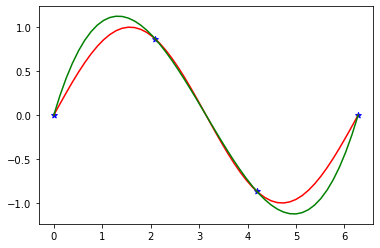

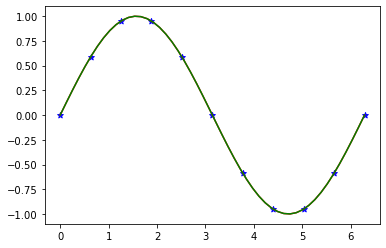

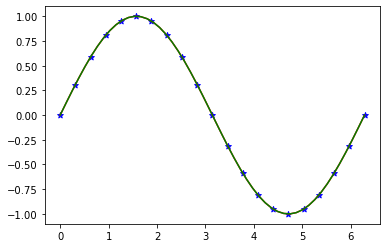

In [6]:
plot_lagrange_real(3, math.sin,0,2*math.pi)
plot_lagrange_real(10, math.sin,0,2*math.pi)
plot_lagrange_real(20, math.sin,0,2*math.pi)

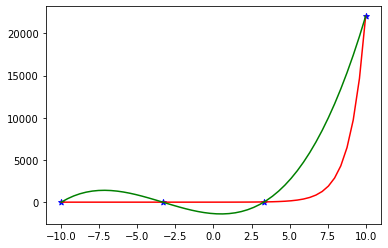

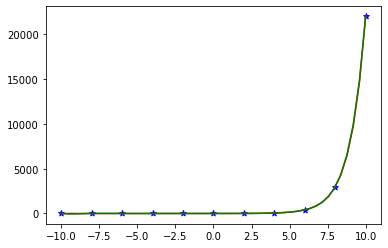

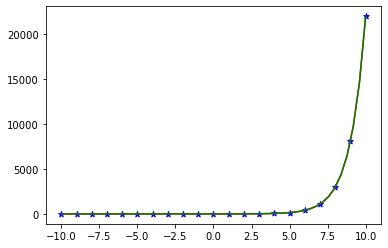

In [7]:
plot_lagrange_real(3, math.exp,-10,10)
plot_lagrange_real(10, math.exp,-10,10)
plot_lagrange_real(20, math.exp,-10,10)

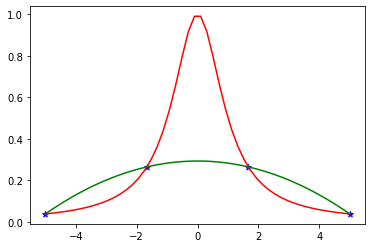

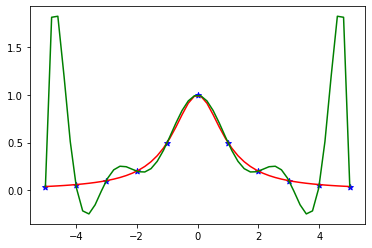

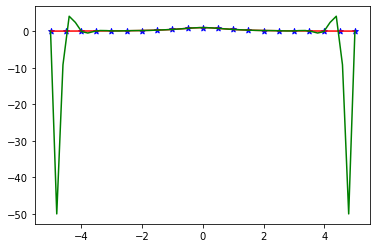

In [8]:
def f(x):
    return 1/(1+x**2)
plot_lagrange_real(3,f,-5,5)
plot_lagrange_real(10,f,-5,5)
plot_lagrange_real(20,f,-5,5)

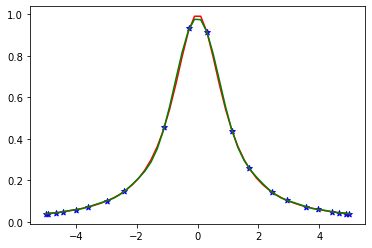

In [9]:
plot_lagrange_real(20,f,-5,5,1)

In [21]:
def InterParIntervalle(n,f,a,b,p,x):
    i = np.floor(n*(x-a)/(b-a))
    Ai = a + i*(b-a)/n
    Ai1 = Ai + (b-a)/n
    return InterpLagrange(np.linspace(Ai,Ai1,p+1),f,x)

def InterParIntervalle2(n,f,a,b,p,x):
    L = np.linspace(a,b,n+1)
    k=0
    for i in range(n):
        if x >= L[i] and x <= L[i+1]:
            k=i
    return InterpLagrange(np.linspace(L[k],L[k+1],p+1),f,x)

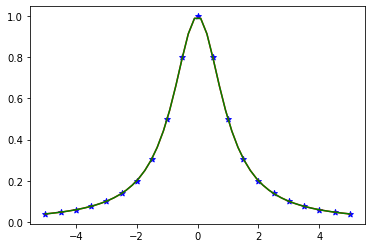

In [22]:
def plot_lagrange_interv(n,f,a,b,inter = 0):
    if inter == 0:
        interpolation_points = np.linspace(a,b,n+1)
    if inter == 1:
        interpolation_points = [(a+b)/2 + (b-a)/2 * math.cos(2*k+1/(n+1)*math.pi/2) for k in range(n+1)]
    x1 = np.linspace(a,b,50)
    y1 = [f(x) for x in x1]
    y2 = [InterParIntervalle2(n,f,a,b,5,x) for x in x1]
    plt.plot(x1,y1,c='r') #function
    plt.plot(x1,y2,c='g') #polynome
    plt.scatter(interpolation_points,[f(x) for x in interpolation_points],marker='*' ,color='b')
    plt.show()
plot_lagrange_interv(20,f,-5,5)